In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("income.csv")

In [3]:
df.head()

,name,age,income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


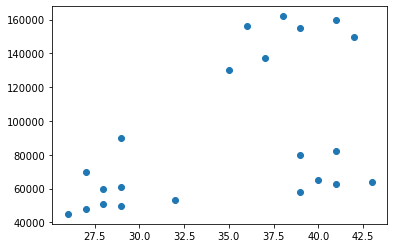

In [4]:
plt.scatter(x=df.age,y=df['income($)'] )

**Observation**
- we see only three cluster is formed

In [5]:
km=KMeans(n_clusters=3)
ypred=km.fit_predict(df[['age','income($)']])
ypred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [6]:
df['Cluster']=ypred

In [7]:
df.head()

,name,age,income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [8]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [9]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


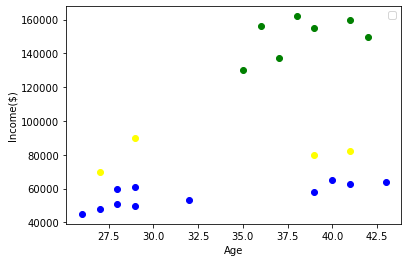

In [10]:
plt.scatter(df1.age,df1[['income($)']],color='green')
plt.scatter(df2.age,df2[['income($)']],color='blue')
plt.scatter(df3.age,df3[['income($)']],color='yellow')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [11]:
scaler=MinMaxScaler()
df['age']=scaler.fit_transform(df[['age']])
df['income($)']=scaler.fit_transform(df[['income($)']])

In [12]:
df.head()

,name,age,income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


**Observation**
- Now our data is scale down

In [13]:
km=KMeans(n_clusters=3)
ypred=km.fit_predict(df[['age','income($)']])
ypred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [14]:
df['Cluster']=ypred

In [15]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


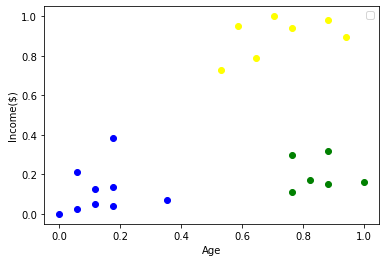

In [16]:
plt.scatter(df1.age,df1[['income($)']],color='green')
plt.scatter(df2.age,df2[['income($)']],color='blue')
plt.scatter(df3.age,df3[['income($)']],color='yellow')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

**Observation**
- now we can see the three different cluster

# Find the Value of K using Elbow methods

In [17]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','income($)']])
    sse.append(km.inertia_)

In [18]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.1845404300913277,
 0.13781880133764024,
 0.10188787724979426]

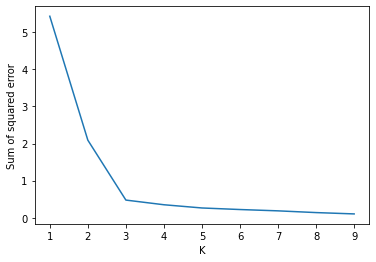

In [19]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)

**Observation**
- the elbow is in point 3